In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import cufflinks as cf
from chart_studio import plotly
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             7007 non-null   object 
 1   Lead_name              7007 non-null   object 
 2   Industry               7006 non-null   object 
 3   Deal_value             6956 non-null   object 
 4   Weighted_amount        6482 non-null   object 
 5   Date_of_creation       7007 non-null   object 
 6   Pitch                  7007 non-null   object 
 7   Contact_no             7007 non-null   object 
 8   Lead_revenue           7007 non-null   object 
 9   Fund_category          7007 non-null   object 
 10  Geography              6035 non-null   object 
 11  Location               6996 non-null   object 
 12  POC_name               6999 non-null   object 
 13  Designation            7007 non-null   object 
 14  Lead_POC_email         7007 non-null   object 
 15  Hiri

In [6]:
data.shape

(7007, 23)

In [7]:
data.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                51
Weighted_amount          525
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
POC_name                   8
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Internal_POC               0
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [8]:
data.nunique()

Deal_title               7007
Lead_name                7007
Industry                  171
Deal_value               6907
Weighted_amount          6480
Date_of_creation          777
Pitch                       2
Contact_no               7007
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
POC_name                 5261
Designation                10
Lead_POC_email           7007
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             5
Success_probability       248
dtype: int64

In [9]:
test = pd.read_csv('test.csv')
print(test.shape)
print(test.nunique())
print(test.isnull().sum())

(2093, 22)
Deal_title               2093
Lead_name                2093
Industry                  138
Deal_value               2083
Weighted_amount          2033
Date_of_creation          720
Pitch                       2
Contact_no               2093
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  565
POC_name                 1745
Designation                10
Lead_POC_email           2093
Hiring_candidate_role     618
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             7
dtype: int64
Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                 5
Weighted_amount           60
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                 

Text(0.5, 1.0, 'Success_probability')

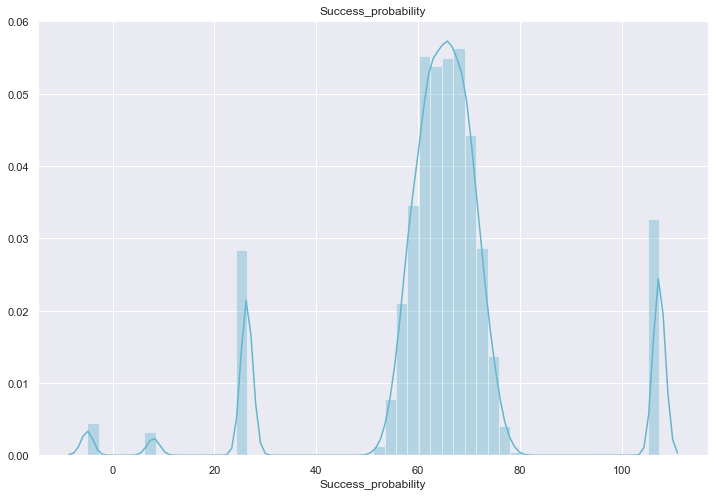

In [10]:
sb.set(style='darkgrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sb.distplot(data['Success_probability'], kde = True, color = 'c')
plt.title('Success_probability')

Text(0.5, 1.0, 'Success_probability')

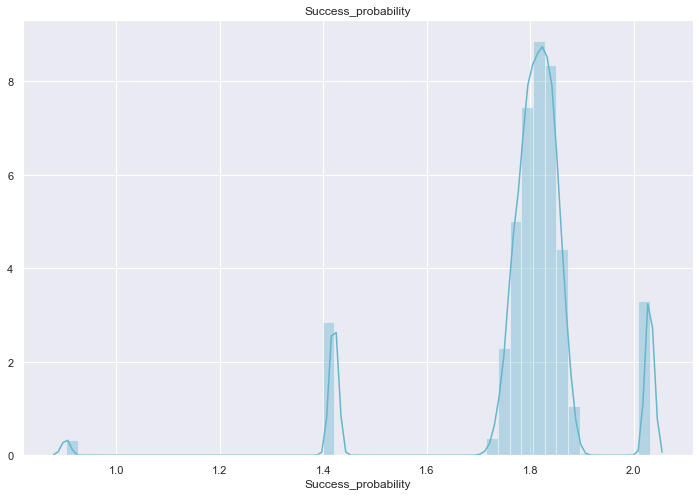

In [11]:
sb.set(style='darkgrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sb.distplot(np.log10(data['Success_probability']), kde = True, color = 'c')
plt.title('Success_probability')

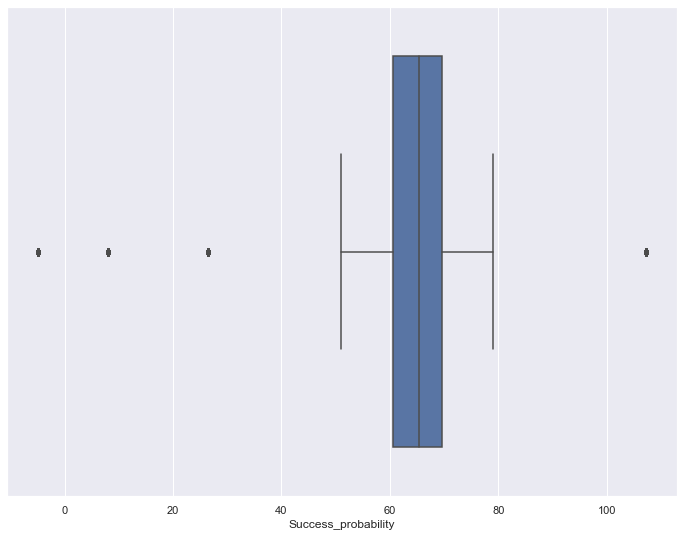

In [12]:
plt.figure(figsize=(12,9))
sb.boxplot(data['Success_probability'])

In [13]:
df = data.append(test)
df

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3.0,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4.0,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,Title2R8VU,"Phillips, Smith and Jones Inc",BioTech/Drugs,417150$,2732332.5$,2020-11-25,Product_2,(444)658-6350x207,100 - 500 Million,Category 3,...,Chairman/CEO/President,williamspears@phillips.com,Community development worker,Marketing Event,Level 3,No track,"Ross,Eric L",No,1.0,NaN
2089,Title7HCNJ,Elliott-Morales PLC,Real Estate,488661$,2956399.05$,2019-10-20,Product_2,1377254815,50 - 100 Million,Category 3,...,Chief Executive Officer,amypage@elliottmorales.com,Forest/woodland manager,Others,Level 2,Following up but lead not responding,"Abdul-Hamid,Saud Muhamad",Cannot deliver,5.0,NaN
2090,TitleCD5YZ,Herrera-Santos PLC,Sales/Marketing Services,421119$,2631993.75$,2019-03-23,Product_1,695-757-3607x5834,50 - 100 Million,Category 1,...,CEO/Co-Founder/Chairman,markcombs@herrerasantos.com,Actuary,Contact Email,Level 1,?,"Bannister,Joan",Deliverable,5.0,NaN
2091,Title8OKXL,"Howard, Martinez and Jacobs PLC",Banks,59879$,350292.15$,2019-02-05,Product_1,+1-688-318-4079x644,50 - 100 Million,Category 2,...,Chief Executive Officer,justinmorgan@howard.com,"Designer, textile",Marketing Event,Level 1,NaN,"Murray,Younetta",We have all the requirements,5.0,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9100 entries, 0 to 2092
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             9100 non-null   object 
 1   Lead_name              9100 non-null   object 
 2   Industry               9098 non-null   object 
 3   Deal_value             9044 non-null   object 
 4   Weighted_amount        8515 non-null   object 
 5   Date_of_creation       9100 non-null   object 
 6   Pitch                  9100 non-null   object 
 7   Contact_no             9100 non-null   object 
 8   Lead_revenue           9100 non-null   object 
 9   Fund_category          9100 non-null   object 
 10  Geography              8049 non-null   object 
 11  Location               9086 non-null   object 
 12  POC_name               9090 non-null   object 
 13  Designation            9100 non-null   object 
 14  Lead_POC_email         9100 non-null   object 
 15  Hiri

In [15]:
df.nunique()

Deal_title               9100
Lead_name                9100
Industry                  172
Deal_value               8967
Weighted_amount          8513
Date_of_creation          777
Pitch                       2
Contact_no               9100
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
POC_name                 6633
Designation                10
Lead_POC_email           9099
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             7
Success_probability       248
dtype: int64

In [16]:
df['Industry'].value_counts()

Banks                        1942
Insurance                     599
Financial Services            495
Real Estate                   277
Investment Bank/Brokerage     262
                             ... 
BSPs (Broadband)                1
eMail/Messaging                 1
Web                             1
ERP                             1
Hardware Consulting             1
Name: Industry, Length: 172, dtype: int64

In [18]:
df['Deal_value'] = df['Deal_value'].str.replace(',', '').str.replace('$', '').astype(float)
df['Weighted_amount'] = df['Weighted_amount'].str.replace(',', '').str.replace('$', '').astype(float)

In [19]:
df

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.70,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3.0,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,240876.80,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.40,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4.0,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,468321.40,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,Title2R8VU,"Phillips, Smith and Jones Inc",BioTech/Drugs,417150.0,2732332.50,2020-11-25,Product_2,(444)658-6350x207,100 - 500 Million,Category 3,...,Chairman/CEO/President,williamspears@phillips.com,Community development worker,Marketing Event,Level 3,No track,"Ross,Eric L",No,1.0,NaN
2089,Title7HCNJ,Elliott-Morales PLC,Real Estate,488661.0,2956399.05,2019-10-20,Product_2,1377254815,50 - 100 Million,Category 3,...,Chief Executive Officer,amypage@elliottmorales.com,Forest/woodland manager,Others,Level 2,Following up but lead not responding,"Abdul-Hamid,Saud Muhamad",Cannot deliver,5.0,NaN
2090,TitleCD5YZ,Herrera-Santos PLC,Sales/Marketing Services,421119.0,2631993.75,2019-03-23,Product_1,695-757-3607x5834,50 - 100 Million,Category 1,...,CEO/Co-Founder/Chairman,markcombs@herrerasantos.com,Actuary,Contact Email,Level 1,?,"Bannister,Joan",Deliverable,5.0,NaN
2091,Title8OKXL,"Howard, Martinez and Jacobs PLC",Banks,59879.0,350292.15,2019-02-05,Product_1,+1-688-318-4079x644,50 - 100 Million,Category 2,...,Chief Executive Officer,justinmorgan@howard.com,"Designer, textile",Marketing Event,Level 1,NaN,"Murray,Younetta",We have all the requirements,5.0,NaN


In [20]:
df['Fund_category'] = df['Fund_category'].str.replace('Category ', '').astype(int)
df['Level_of_meeting'] = df['Level_of_meeting'].str.replace('Level ', '').astype(int)

In [28]:
pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_rows',1000)

In [29]:
df['Location'].unique()

array(['Killeen-Temple, TX', 'Ratlam', 'Albany-Schenectady-Troy, NY',
       'Mount Vernon-Anacortes, WA', 'Shimoga', 'Bulandshahr',
       'Salisbury, MD-DE', 'Jacksonville, FL',
       'Seattle-Tacoma-Bellevue, WA', 'Clarksville, TN-KY',
       'Oxnard-Thousand Oaks-Ventura, CA', 'Lafayette, LA',
       'Danville, IL', 'Pilibhit', 'Nanded', 'Mobile, AL',
       'Miami-Fort Lauderdale-West Palm Beach, FL', 'Columbus, IN',
       'Vellore', 'Srinagar', 'Peoria, IL', 'Alipurduar', 'Bharauri',
       'Ahmadnagar', 'Grand Junction, CO', 'Chirala', 'Bhubaneshwar',
       'Chambersburg-Waynesboro, PA', 'Thanjavur', 'Bakshpur',
       'Springfield, OH', 'Gaya', 'Puducherry', 'Chico, CA', 'Bellary',
       'Monroe, MI', 'Winchester, VA-WV', 'Salinas, CA',
       'Watertown-Fort Drum, NY', 'Providence-Warwick, RI-MA',
       'Dibrugarh', 'Gadsden, AL', 'Tiruvannamalai', 'Dayton, OH',
       'Ranchi', 'Lake Havasu City-Kingman, AZ',
       'Lakeland-Winter Haven, FL', 'Reno, NV',
       'Kingsp

In [30]:
df['POC_name'].unique()

array(['Charlene Werner', 'rakhi', 'Ariel Hamilton', ...,
       'Jeffery Obrien', 'William Spears', 'Amy Page'], dtype=object)

In [31]:
per_missing = df.isnull().sum()/len(df)*100
per_missing = per_missing[per_missing>0]
per_missing.sort_values(ascending = False)

Success_probability    23.000000
Geography              11.549451
Last_lead_update        8.802198
Weighted_amount         6.428571
Resource                1.791209
Deal_value              0.615385
Location                0.153846
POC_name                0.109890
Industry                0.021978
dtype: float64

In [32]:
df.nunique()

Deal_title               9100
Lead_name                9100
Industry                  172
Deal_value               8967
Weighted_amount          8513
Date_of_creation          777
Pitch                       2
Contact_no               9100
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
POC_name                 6633
Designation                10
Lead_POC_email           9099
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             7
Success_probability       248
dtype: int64

In [35]:
df['Date_of_creation'] = pd.to_datetime(df['Date_of_creation'], format='%Y-%m-%d')
df

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.70,2020-03-29,Product_2,607.447.7883,50 - 100 Million,2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,3,No track,"Davis,Sharrice A",NaN,3.0,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,240876.80,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.40,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,1,?,"Georgakopoulos,Vasilios T",No,4.0,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,468321.40,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,2,Up-to-date,"Thomas,Lori E",No,4.0,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,Title2R8VU,"Phillips, Smith and Jones Inc",BioTech/Drugs,417150.0,2732332.50,2020-11-25,Product_2,(444)658-6350x207,100 - 500 Million,3,...,Chairman/CEO/President,williamspears@phillips.com,Community development worker,Marketing Event,3,No track,"Ross,Eric L",No,1.0,NaN
2089,Title7HCNJ,Elliott-Morales PLC,Real Estate,488661.0,2956399.05,2019-10-20,Product_2,1377254815,50 - 100 Million,3,...,Chief Executive Officer,amypage@elliottmorales.com,Forest/woodland manager,Others,2,Following up but lead not responding,"Abdul-Hamid,Saud Muhamad",Cannot deliver,5.0,NaN
2090,TitleCD5YZ,Herrera-Santos PLC,Sales/Marketing Services,421119.0,2631993.75,2019-03-23,Product_1,695-757-3607x5834,50 - 100 Million,1,...,CEO/Co-Founder/Chairman,markcombs@herrerasantos.com,Actuary,Contact Email,1,?,"Bannister,Joan",Deliverable,5.0,NaN
2091,Title8OKXL,"Howard, Martinez and Jacobs PLC",Banks,59879.0,350292.15,2019-02-05,Product_1,+1-688-318-4079x644,50 - 100 Million,2,...,Chief Executive Officer,justinmorgan@howard.com,"Designer, textile",Marketing Event,1,NaN,"Murray,Younetta",We have all the requirements,5.0,NaN


In [36]:
import datetime as dt
df['year'] = df['Date_of_creation'].dt.year
df['month'] = df['Date_of_creation'].dt.month
df['day'] = df['Date_of_creation'].dt.day
df

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,year,month,day
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.70,2020-03-29,Product_2,607.447.7883,50 - 100 Million,2,...,Website,3,No track,"Davis,Sharrice A",NaN,3.0,73.6,2020,3,29
1,TitleKIW18,Bender PLC LLC,Construction Services,39488.0,240876.80,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,4,...,Others,1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0,58.9,2019,7,10
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392.0,2407926.40,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,4,...,Marketing Event,1,?,"Georgakopoulos,Vasilios T",No,4.0,68.8,2019,7,27
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774.0,468321.40,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,3,...,Contact Email,2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0,64.5,2021,1,30
4,Title904GV,Lee and Sons PLC,Financial Services,483896.0,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,3,...,Website,2,Up-to-date,"Thomas,Lori E",No,4.0,62.4,2019,5,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,Title2R8VU,"Phillips, Smith and Jones Inc",BioTech/Drugs,417150.0,2732332.50,2020-11-25,Product_2,(444)658-6350x207,100 - 500 Million,3,...,Marketing Event,3,No track,"Ross,Eric L",No,1.0,NaN,2020,11,25
2089,Title7HCNJ,Elliott-Morales PLC,Real Estate,488661.0,2956399.05,2019-10-20,Product_2,1377254815,50 - 100 Million,3,...,Others,2,Following up but lead not responding,"Abdul-Hamid,Saud Muhamad",Cannot deliver,5.0,NaN,2019,10,20
2090,TitleCD5YZ,Herrera-Santos PLC,Sales/Marketing Services,421119.0,2631993.75,2019-03-23,Product_1,695-757-3607x5834,50 - 100 Million,1,...,Contact Email,1,?,"Bannister,Joan",Deliverable,5.0,NaN,2019,3,23
2091,Title8OKXL,"Howard, Martinez and Jacobs PLC",Banks,59879.0,350292.15,2019-02-05,Product_1,+1-688-318-4079x644,50 - 100 Million,2,...,Marketing Event,1,NaN,"Murray,Younetta",We have all the requirements,5.0,NaN,2019,2,5


In [37]:
df['Designation'].unique()

array(['Executive Vice President', 'Chairman/CEO/President',
       'SVP/General Counsel ', 'CEO/Co-Founder/Chairman',
       'Vice President / GM (04-present) : VP Sales and Marketing (01-04)',
       'Chairman/Chief Innovation Officer', 'CEO',
       'CEO/Chairman/President', 'CEO/President',
       'Chief Executive Officer'], dtype=object)

In [38]:
df['Lead_POC_email'].unique()

array(['charlenewerner@davis.com', 'terrylogan@bender.com',
       'arielhamilton@carterhenry.com', ...,
       'markcombs@herrerasantos.com', 'justinmorgan@howard.com',
       'juansalazar@smith.com'], dtype=object)

In [39]:
df['Hiring_candidate_role'].unique()

array(['Community pharmacist', 'Recruitment consultant',
       'Health service manager', 'Therapist, speech and language',
       'Media planner', 'Microbiologist', 'Cartographer',
       'Engineer, maintenance (IT)',
       'Product/process development scientist', 'Engineering geologist',
       'Hydrogeologist', 'Scientist, audiological',
       'Speech and language therapist', 'Hospital doctor',
       'Public affairs consultant', 'Sports coach',
       'Broadcast journalist', 'Phytotherapist',
       'Sales promotion account executive', 'Teacher, early years/pre',
       'Early years teacher', 'Actor', 'Software engineer',
       'Warden/ranger', 'Neurosurgeon', 'Designer, multimedia',
       'Quantity surveyor', 'Armed forces operational officer',
       'TEFL teacher', 'Civil Service administrator', 'Archaeologist',
       'Programmer, systems', 'Financial adviser',
       'Operational investment banker', 'Trade union research officer',
       'Housing manager/officer', 'Interio

In [40]:
df['Lead_source'].value_counts()

Marketing Event    2337
Contact Email      2286
Others             2267
Website            2210
Name: Lead_source, dtype: int64

In [41]:
df['Last_lead_update'].value_counts()

Up-to-date                              799
more than a month                       785
Following up but lead not responding    782
?                                       775
No track                                766
2 days back                             763
5 days back                             750
More than 2 weeks                       742
Did not hear back after Level 1         726
More than a week back                   708
Pending                                 703
Name: Last_lead_update, dtype: int64

In [42]:
df['Internal_POC'].value_counts()

Hebron,Artenia D             172
Dunaway,Antoine              171
Himes,Maurice C              171
Booker,David L               168
Hameier,Kurt E               167
Murray,Younetta              166
Leu,Darren L                 166
Featherstone,Adrian R        164
Georgakopoulos,Vasilios T    164
Maine,John P                 164
Ullrich,Rose Anne            162
Carter Sr,Clifton E          161
Green,Candy                  159
Salyers,Daniel L             159
Gilley,Janine                159
Turner,Marlon D              158
Hanyok,John J                157
Charles,Caleb                157
Heidelberg,Andre D           157
Davis,Brian R                156
Rocks,Michael J              156
Mabrey,Kevin C               156
Shelton,Sidney P             155
Green,Ann E                  155
Young,Valerie K              154
Clavey,Therese A             154
Davis,Sharrice A             154
Morsy,Omar A                 154
Sutton,Michelle R            153
Cash,Tyrone J                153
Brown,Maxi

In [43]:
df['Resource'].value_counts()

No                              1544
We have all the requirements    1505
Cannot deliver                  1497
Not enough                      1491
Yes                             1462
Deliverable                     1438
Name: Resource, dtype: int64

In [44]:
df.drop(["Deal_title","Lead_name","Date_of_creation","Contact_no","Location",
          "POC_name","Lead_POC_email","Hiring_candidate_role",
          "Last_lead_update","Internal_POC"], axis=1, inplace=True)

In [45]:
df.isnull().sum()

Industry                  2
Deal_value               56
Weighted_amount         585
Pitch                     0
Lead_revenue              0
Fund_category             0
Geography              1051
Designation               0
Lead_source               0
Level_of_meeting          0
Resource                163
Internal_rating           0
Success_probability    2093
year                      0
month                     0
day                       0
dtype: int64

In [46]:
df['Industry'].value_counts()

Banks                                   1942
Insurance                                599
Financial Services                       495
Real Estate                              277
Investment Bank/Brokerage                262
Healthcare Facilities/Services           226
Hospitals/Clinics                        203
Other                                    200
Construction Services                    184
Education/Training                       179
REIT                                     149
Software                                 142
Other Biz Services                       133
Other Investment Firms                   131
Food Processing                          129
Biotech/Healthcare                       122
Materials/Manufacturing                  114
Architecture/Engineering                 107
Oil, Gas, Coal                            89
Apparel Retail                            87
Non-Profit                                87
Staffing                                  85
Technology

In [47]:
df['Geography'].mode()

0    USA
dtype: object

In [49]:
df['Industry'].fillna('Banks',inplace = True)
df['Deal_value'].fillna(df['Deal_value'].mean(),inplace = True)
df['Weighted_amount'].fillna(df['Weighted_amount'].mean(),inplace = True)
df['Geography'].fillna(method='ffill', inplace = True)
df['Resource'].fillna(method='ffill',inplace=True)
df.isnull().sum()

Industry                  0
Deal_value                0
Weighted_amount           0
Pitch                     0
Lead_revenue              0
Fund_category             0
Geography                 0
Designation               0
Lead_source               0
Level_of_meeting          0
Resource                  0
Internal_rating           0
Success_probability    2093
year                      0
month                     0
day                       0
dtype: int64

In [56]:
df

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability,year,month,day
0,Restaurants,320506.0,2.067264e+06,Product_2,50 - 100 Million,2,USA,Executive Vice President,Website,3,No,3.0,73.6,2020,3,29
1,Construction Services,39488.0,2.408768e+05,Product_2,500 Million - 1 Billion,4,India,Chairman/CEO/President,Others,1,No,5.0,58.9,2019,7,10
2,Hospitals/Clinics,359392.0,2.407926e+06,Product_1,500 Million - 1 Billion,4,USA,SVP/General Counsel,Marketing Event,1,No,4.0,68.8,2019,7,27
3,Real Estate,76774.0,4.683214e+05,Product_2,500 Million - 1 Billion,3,USA,CEO/Co-Founder/Chairman,Contact Email,2,We have all the requirements,1.0,64.5,2021,1,30
4,Financial Services,483896.0,1.566788e+06,Product_2,50 - 100 Million,3,India,Executive Vice President,Website,2,No,4.0,62.4,2019,5,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,BioTech/Drugs,417150.0,2.732332e+06,Product_2,100 - 500 Million,3,USA,Chairman/CEO/President,Marketing Event,3,No,1.0,NaN,2020,11,25
2089,Real Estate,488661.0,2.956399e+06,Product_2,50 - 100 Million,3,USA,Chief Executive Officer,Others,2,Cannot deliver,5.0,NaN,2019,10,20
2090,Sales/Marketing Services,421119.0,2.631994e+06,Product_1,50 - 100 Million,1,India,CEO/Co-Founder/Chairman,Contact Email,1,Deliverable,5.0,NaN,2019,3,23
2091,Banks,59879.0,3.502922e+05,Product_1,50 - 100 Million,2,India,Chief Executive Officer,Marketing Event,1,We have all the requirements,5.0,NaN,2019,2,5


In [57]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [76]:
df['Geography'] = enc.fit_transform(df['Geography'])
df['Level_of_meeting']=enc.fit_transform(df['Level_of_meeting'])
df['Industry']= enc.fit_transform(df['Industry'])
df['Lead_revenue'] = enc.fit_transform(df['Lead_revenue'])
df['Lead_source'] = enc.fit_transform(df['Lead_source'])
df['Resource'] = enc.fit_transform(df['Resource'])
df['Designation'] = enc.fit_transform(df['Designation'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9100 entries, 0 to 2092
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Industry             9100 non-null   int64  
 1   Deal_value           9100 non-null   float64
 2   Weighted_amount      9100 non-null   float64
 3   Pitch                9100 non-null   int32  
 4   Lead_revenue         9100 non-null   int64  
 5   Fund_category        9100 non-null   int32  
 6   Geography            9100 non-null   int64  
 7   Designation          9100 non-null   int32  
 8   Lead_source          9100 non-null   int64  
 9   Level_of_meeting     9100 non-null   int64  
 10  Resource             9100 non-null   int64  
 11  Internal_rating      9100 non-null   float64
 12  Success_probability  7007 non-null   float64
 13  year                 9100 non-null   int64  
 14  month                9100 non-null   int64  
 15  day                  9100 non-null   i

In [77]:
df['Pitch'] = df['Pitch'].str.replace('Product_','').astype(int)
df.info()

AttributeError: Can only use .str accessor with string values!

In [78]:
df['Pitch'].value_counts()

2    4566
1    4534
Name: Pitch, dtype: int64

In [79]:
X_test = df[df['Success_probability'].isnull()]
X_test.drop('Success_probability',axis =1,inplace = True)
X_test.shape

(2093, 15)

In [80]:
X = df[~df['Success_probability'].isnull()]
X.shape

(7007, 16)

In [81]:
y= X['Success_probability']
X.drop('Success_probability',axis=1,inplace=True)
print(X.shape,y.shape)

(7007, 15) (7007,)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [106]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [107]:
models = {
    "LinearRegression     ":LinearRegression(),
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressoe":DecisionTreeRegressor(),
    "KNN                  ":KNeighborsRegressor(),
    "SVR                  ":SVR(),
    "Neural network       ":MLPRegressor(),
    "XG Boost             ":XGBRegressor()
}

In [109]:
# Build some models and check them against training data using MAE, RMSE and R2
for name,model in models.items():
    model.fit(X, y)
    predictions = model.predict(X)
    print(name)
    print("    MAE", mean_absolute_error(y, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y, predictions)))
    print("    R2", r2_score(y, predictions))

LinearRegression     
    MAE 8.384379531744205
    RMSE 17.536364595278666
    R2 0.04346399687913838
RandomForestRegressor
    MAE 3.7554071642642985
    RMSE 6.765569554365417
    R2 0.8576259251326928
DecisionTreeRegressoe
    MAE 1.62754544155125e-16
    RMSE 1.3252458631871469e-15
    R2 1.0
KNN                  
    MAE 9.815540744969317
    RMSE 15.720963312249868
    R2 0.2312581986743567
SVR                  
    MAE 7.86691246447945
    RMSE 17.4972962945428
    R2 0.04772127705672169
Neural network       
    MAE 8.448749136760764
    RMSE 17.473168933784862
    R2 0.050345697526885225
XG Boost             
    MAE 5.414667074596284
    RMSE 9.23367310039714
    R2 0.7348014293704235


In [141]:
sub = pd.DataFrame()
sub['Deal_title'] = test['Deal_title']

In [137]:
dt =  DecisionTreeRegressor()
dt.fit(X,y)
pred=dt.predict(scaler.fit_transform(X_test))

In [138]:
sub["Success_probability"] = pred
sub

,Deal_title,Success_probability
0,TitleAD16O,56.9
1,TitleOW6CR,67.8
2,TitleVVJQ5,67.4
3,TitleUS8NA,61.8
4,Title5VGWW,68.1
...,...,...
2088,Title2R8VU,68.1
2089,Title7HCNJ,66.4
2090,TitleCD5YZ,60.6
2091,Title8OKXL,56.7


In [147]:
sub.to_csv('sub.csv',index= False,index_label = 'Deal_title')

In [148]:
su = pd.read_csv('sub.csv')
su

,Deal_title,Success_probability
0,TitleAD16O,41.066610
1,TitleOW6CR,42.718193
2,TitleVVJQ5,43.228752
3,TitleUS8NA,41.950700
4,Title5VGWW,43.313340
...,...,...
2088,Title2R8VU,43.097490
2089,Title7HCNJ,42.502342
2090,TitleCD5YZ,41.051810
2091,Title8OKXL,41.407536


In [142]:
xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [146]:
xg_reg.fit(X,y)
xg_pred = xg_reg.predict(scaler.fit_transform(X_test))
sub["Success_probability"]=xg_pred
sub

,Deal_title,Success_probability
0,TitleAD16O,41.066608
1,TitleOW6CR,42.718193
2,TitleVVJQ5,43.228752
3,TitleUS8NA,41.950699
4,Title5VGWW,43.313339
...,...,...
2088,Title2R8VU,43.097488
2089,Title7HCNJ,42.502342
2090,TitleCD5YZ,41.051811
2091,Title8OKXL,41.407536


In [144]:
X_test

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Lead_source,Level_of_meeting,Resource,Internal_rating,year,month,day
0,66,200988.0,1.566788e+06,1,0,4,0,4,1,0,2,-1.0,2020,4,15
1,39,409961.0,2.541758e+06,1,0,3,1,2,1,1,5,1.0,2021,1,23
2,17,434433.0,3.041031e+06,1,0,1,1,5,1,1,1,5.0,2020,7,19
3,81,218952.0,1.521716e+06,2,0,1,0,1,0,2,2,5.0,2020,2,27
4,115,392835.0,2.455219e+06,1,2,3,1,2,2,2,1,2.0,2020,10,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,20,417150.0,2.732332e+06,2,0,3,1,4,1,2,2,1.0,2020,11,25
2089,115,488661.0,2.956399e+06,2,1,3,1,6,2,1,0,5.0,2019,10,20
2090,123,421119.0,2.631994e+06,1,1,1,0,2,0,0,1,5.0,2019,3,23
2091,17,59879.0,3.502922e+05,1,1,2,0,6,1,0,4,5.0,2019,2,5


In [145]:
X

array([[0.70175439, 0.63989495, 0.57298167, ..., 0.5       , 0.18181818,
        0.93333333],
       [0.18128655, 0.07611009, 0.06462223, ..., 0.        , 0.54545455,
        0.3       ],
       [0.32748538, 0.71790895, 0.66780227, ..., 0.        , 0.54545455,
        0.86666667],
       ...,
       [0.76608187, 0.50568263, 0.4336784 , ..., 0.5       , 0.18181818,
        0.3       ],
       [0.0994152 , 0.23485652, 0.21877997, ..., 0.        , 1.        ,
        0.83333333],
       [0.26900585, 0.51575186, 0.45469144, ..., 0.5       , 0.27272727,
        0.86666667]])